In [ ]:
#載入所需模組
import cv2
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import pandas as pd
from numpy import load
from numpy import save
import random
import os
import gc

In [ ]:
#事先將資料上傳到google drive 然後用google colab 連接
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
labels = os.listdir("/content/gdrive/My Drive/Covid_data_merge")
labels

['Normal', 'Viral Pneumonia', 'COVID', 'Lung_Opacity']

In [ ]:
import cv2
import numpy as np
number = [0]
tem = 0
for i in range(len(labels)):
  path = "/content/gdrive/My Drive/Covid_data_merge/" + labels[i]
  tem = tem + len(os.listdir(path))
  number += [len(os.listdir(path))]
print(number)
data = np.zeros((tem,150,150),dtype = int)
y = np.zeros((tem,len(labels)),dtype = int)
tem = 0
for i in range(len(labels)):
  print(labels[i])
  path = "/content/gdrive/My Drive/Covid_data_merge/" + labels[i]
  os.chdir(path)
  pic_list = os.listdir(path)
  tem += number[i]
  for j in range(len(pic_list)):
    y[tem + j,i] = 1
    data[tem + j,:,:] = cv2.imread(pic_list[j], cv2.IMREAD_GRAYSCALE)

[0, 10192, 1345, 3616, 6012]
Normal
Viral Pneumonia
COVID
Lung_Opacity


In [ ]:
y[20000,:]

array([0, 0, 0, 1])

In [ ]:
gc.collect()
n = sum(number)
random_index = np.array(random.sample(range(0,n),n))
data = data[random_index,:,:]
y = y[random_index,:]
gc.collect()

0

In [ ]:
test_index = np.array(random.sample(range(0,n), int(n * 0.2)))
train_index = np.ones(n, dtype=bool)
train_index[test_index] = False
test_label = y[test_index,:]
train_label = y[train_index,:]

In [ ]:
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(150, 150, 1)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (2, 2), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(128, (2, 2), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(256, (2, 2), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(512, (2, 2), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Flatten())
cnn_model.add(tf.keras.layers.Dropout(0.5))
cnn_model.add(layers.Dense(512, activation='relu'))
cnn_model.add(layers.Dense(4, activation="softmax"))
cnn_model.summary()
gc.collect()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 149, 149, 32)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 73, 73, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 35, 35, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

0

In [ ]:
cnn_model.compile(optimizer="Adam",
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

history = cnn_model.fit(data[train_index,:,:], train_label, epochs=10,batch_size = 1 , 
                    validation_data=(data[test_index,:,:], test_label))

Epoch 1/10
16932/16932 [==============================] - 1070s 63ms/step - loss: 1.1081 - accuracy: 0.5385 - val_loss: 0.8609 - val_accuracy: 0.6468
Epoch 2/10
16932/16932 [==============================] - 1068s 63ms/step - loss: 0.8218 - accuracy: 0.6758 - val_loss: 0.7207 - val_accuracy: 0.7012
Epoch 3/10
16932/16932 [==============================] - 1078s 64ms/step - loss: 0.7113 - accuracy: 0.7286 - val_loss: 0.6015 - val_accuracy: 0.7772
Epoch 4/10
16932/16932 [==============================] - 1090s 64ms/step - loss: 0.7030 - accuracy: 0.7273 - val_loss: 0.6078 - val_accuracy: 0.7626
Epoch 5/10
16932/16932 [==============================] - 1091s 64ms/step - loss: 0.6492 - accuracy: 0.7547 - val_loss: 0.6252 - val_accuracy: 0.7579
Epoch 6/10
16932/16932 [==============================] - 1087s 64ms/step - loss: 0.6321 - accuracy: 0.7590 - val_loss: 0.6579 - val_accuracy: 0.7297
Epoch 7/10
16932/16932 [==============================] - 1088s 64ms/step - loss: 0.6366 - accuracy:

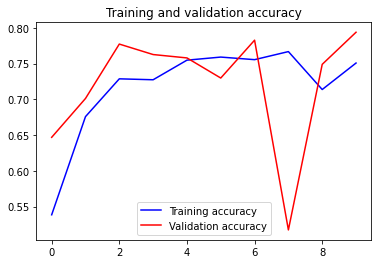

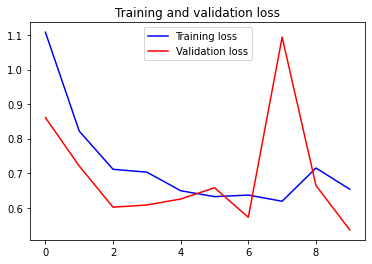

In [19]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

COVID-3372.png


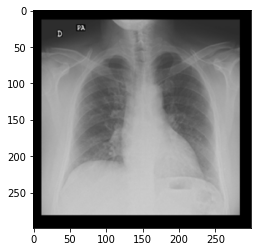

In [ ]:
def show_grey(x):
    y = np.zeros((299,299,3))
    y[:,:,0] = x
    y[:,:,1] = x
    y[:,:,2] = x
    return y.astype(int)
import matplotlib.pyplot as plt
plt.imshow(show_grey(data[0,:,:]))
print(os.listdir("/content/gdrive/My Drive/Covid_data/" + labels[0])[0])